## *`Importing the Required Libraries`*

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load your dataset into a DataFrame.
data = pd.read_csv(r"C:\Users\yadag\Downloads\uber_rides_data.xlsx - sample_train.csv")

## *`Understanding the uber rides data`*

In [3]:
data.head(10)# Checking the head of the dataframe

,ride_id,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
5,44470845,4.9,2011-02-12 02:27:09 UTC,-73.969019,40.755910,-73.969019,40.755910,1
6,48725865,24.5,2014-10-12 07:04:00 UTC,-73.961447,40.693965,-73.871195,40.774297,5
7,44195482,2.5,2012-12-11 13:52:00 UTC,0.000000,0.000000,0.000000,0.000000,1
8,15822268,9.7,2012-02-17 09:32:00 UTC,-73.975187,40.745767,-74.002720,40.743537,1
9,50611056,12.5,2012-03-29 19:06:00 UTC,-74.001065,40.741787,-73.963040,40.775012,1


### What is the shape of given dataset?

In [4]:
# Checking the shape of the dataframe.
data.shape

(200000, 8)

In [5]:
# Checking the Info() of the dataframe.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ride_id            200000 non-null  int64  
 1   fare_amount        200000 non-null  float64
 2   pickup_datetime    200000 non-null  object 
 3   pickup_longitude   200000 non-null  float64
 4   pickup_latitude    200000 non-null  float64
 5   dropoff_longitude  199999 non-null  float64
 6   dropoff_latitude   199999 non-null  float64
 7   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 12.2+ MB


### How many integer columns(by default) are given in the dataset?

In [6]:
# Checking the Integer columns of the data.
# Select only integer columns
integer_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Count the number of integer columns
num_integer_columns = len(integer_columns)
print(f'Number of integer columns in the dataset: {num_integer_columns}')

Number of integer columns in the dataset: 7


In [7]:
# checking the descritive statistics of the data.
data.describe()

,ride_id,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967153,40.767158,-73.963659,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


## *`Exploratory Data Analysis`*

### *`Checking Duplicates`*

In [8]:
# Checking if any duplicates are present in the dataframe.
data.duplicated().value_counts()

False    200000
dtype: int64

## *`Checking the null values`*

In [9]:
# Checking the null values present in the data.
data.isnull().sum()

ride_id              0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

    There are two null values in the entire dataset which are present in the two columns those columns are 
    1. dropoff_longitude and 2. dropoff_latitude

### How many missing values exists in 'dropoff_longitude' column?

- In the dropoff_longitude there is **One Null value** is present in the data.

In [10]:
data['pickup_datetime']=pd.to_datetime(data['pickup_datetime'])

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   ride_id            200000 non-null  int64              
 1   fare_amount        200000 non-null  float64            
 2   pickup_datetime    200000 non-null  datetime64[ns, UTC]
 3   pickup_longitude   200000 non-null  float64            
 4   pickup_latitude    200000 non-null  float64            
 5   dropoff_longitude  199999 non-null  float64            
 6   dropoff_latitude   199999 non-null  float64            
 7   passenger_count    200000 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(2)
memory usage: 12.2 MB


In [12]:
#  removing the null values from the dataframe.
data.dropna(axis=0, inplace=True)

In [13]:
data.isnull().sum()

ride_id              0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

## What is the average fare amount?
Remove the null values from the dataframe to answer the following question.

In [14]:
# Calculate the average fare
average_fare = sum(data['fare_amount']) / len(data['fare_amount'])

# Print the result
print("Average Fare Amount:", average_fare)

Average Fare Amount: 11.359891549458371


In [15]:
import math
import statistics

# Calculate Haversine distance for each row
def haversine(pickup_latitude, pickup_longitude, dropoff_latitude, dropoff_longitude):
    # Convert latitude and longitude from degrees to radians
    latitude1 = math.radians(pickup_latitude)
    longitude1 = math.radians(pickup_longitude)
    latitude2 = math.radians(dropoff_latitude)
    longitude2 = math.radians(dropoff_longitude)

    # Differences in latitude and longitude
    difference_latitude = latitude2 - latitude1
    difference_longitude = longitude2 - longitude1

    # Haversine formula
    a = math.sin(difference_latitude/2)**2 + math.cos(latitude1) * math.cos(latitude2) * math.sin(difference_longitude/2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    distance = 6371 * c  # Earth's radius in kilometers

    return distance

In [16]:
# Calculate Haversine distances and add a new column to the DataFrame
data["haversine_distance"] = data.apply(lambda column: haversine(column["pickup_latitude"], 
                                                          column["pickup_longitude"], 
                                                          column["dropoff_latitude"],
                                                          column["dropoff_longitude"]), axis=1)

# Print the DataFrame with the new column
data

,ride_id,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,haversine_distance
0,24238194,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,1.683323
1,27835199,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2.457590
2,44984355,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,5.036377
3,25894730,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,1.661683
4,17610152,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,4.475450
...,...,...,...,...,...,...,...,...,...
199995,42598914,3.0,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1,0.112210
199996,16382965,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1,1.875050
199997,27804658,30.9,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.858957,40.692588,2,12.850319
199998,20259894,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695416,1,3.539715


In [17]:
# Calculate the median distance
median_distance = data.haversine_distance.median()

print(f"The median Haversine distance between pickup and dropoff locations is {median_distance:.2f} kilometers.")

The median Haversine distance between pickup and dropoff locations is 2.12 kilometers.


### What is the maximum haversine distance between pickup and dropoff location according to the given dataset?

In [18]:
# Initialize the maximum distance to a small value
max_distance = -1

for distance in data.haversine_distance:
    if distance > max_distance:
        max_distance = distance
        
print(f"The maximum Haversine distance between pickup and dropoff locations is {max_distance:.2f} kilometers.")

The maximum Haversine distance between pickup and dropoff locations is 16409.24 kilometers.


### How many rides have 0.0 haversine distance between pickup and dropoff location according to the given dataset?

In [19]:
zero_distance_count = 0
for dist in data.haversine_distance:
    if dist == 0.0:
        zero_distance_count += 1

print(f"The number of rides with 0.0 Haversine distance between pickup and dropoff locations is: {zero_distance_count}")

The number of rides with 0.0 Haversine distance between pickup and dropoff locations is: 5632


### What is the mean 'fare_amount' for rides with 0 haversine distance?

In [20]:
# Initialize variables for calculating the mean
total_fare = 0
rides_with_zero_distance = 0

for distance in data.haversine_distance:
    if distance == 0.0:
        total_fare += data.fare_amount
        rides_with_zero_distance += 1

# Calculate the mean fare_amount
if rides_with_zero_distance > 0:
    mean_fare_amount = total_fare / rides_with_zero_distance
else:
    mean_fare_amount = 0
        
print(f"The mean 'fare_amount' for rides with 0 Haversine distance is: {mean_fare_amount.mean():.2f}")

The mean 'fare_amount' for rides with 0 Haversine distance is: 11.36


### What is the maximum 'fare_amount' for a ride?

In [21]:
data.fare_amount.max()

499.0

### What is the haversine distance between pickup and dropoff location for the costliest ride?

In [23]:
# Find the row with the highest fare_amount (costliest ride)
costliest_ride = data[data['fare_amount'] == data['fare_amount'].max()]

# Extract the coordinates for the costliest ride
pickup_longitude = costliest_ride['pickup_longitude'].values[0]
pickup_latitude = costliest_ride['pickup_latitude'].values[0]
dropoff_longitude = costliest_ride['dropoff_longitude'].values[0]
dropoff_latitude = costliest_ride['dropoff_latitude'].values[0]

distance = haversine(pickup_latitude, pickup_longitude, dropoff_latitude, dropoff_longitude)

print("Haversine Distance between Pickup and Dropoff for the Costliest Ride:", distance, "km")

Haversine Distance between Pickup and Dropoff for the Costliest Ride: 0.0007899213191009994 km


### How many rides were recorded in the year 2014?

In [24]:
# Find the total rides rides were recorded in 2014.
total_rides_2014 = data[(data['pickup_datetime'] >= '2014-01-01') & (data['pickup_datetime'] <= '2014-12-31')]

# Count the number of rides in 2014
total_ride_count = len(total_rides_2014)

print(f"Total rides recorded in 2014: {total_ride_count}")

Total rides recorded in 2014: 29899


In [25]:
# Filter the DataFrame for rides in 2014
total_rides_2014 = data[(data['pickup_datetime'] >= '2014-01-01 00:00:00 UTC') & (data['pickup_datetime'] <= '2014-12-31 23:59:59 UTC')]

# Count the number of rides in 2014
total_ride_count = len(total_rides_2014)

print(f"Total rides recorded in 2014: {total_ride_count}")

Total rides recorded in 2014: 29968


    I observed that based on the time the rides are also changing noted this point.

### How many rides were recorded in the first quarter of 2014?

In [26]:
# Filter the DataFrame to include only rows from the first quarter of 2014
first_quarter_rides = data[(data['pickup_datetime'] >= '2014-01-01 00:00:00 UTC') & 
                           (data['pickup_datetime'] <= '2014-03-31 23:59:59 UTC')]

# Count the number of rides in the first quarter of 2014
ride_count = len(first_quarter_rides)

print(f"Total rides recorded in the first quarter of 2014: {ride_count}")

Total rides recorded in the first quarter of 2014: 7687


### On which day of the week in September 2010, maximum rides were recorded ?

In [27]:
# Filter the DataFrame to include only rows from September 2010
september_2010_rides = data[(data['pickup_datetime'].dt.year == 2010) & (data['pickup_datetime'].dt.month == 9)]

# Group the data by day of the week and count the number of rides for each day
rides_by_day_of_week = september_2010_rides['pickup_datetime'].dt.day_name().value_counts()

# Find the day of the week with the maximum rides
max_rides_day = rides_by_day_of_week.idxmax()
max_rides_count = rides_by_day_of_week[max_rides_day]

print(f"On {max_rides_day} in September 2010, the maximum rides were recorded: {max_rides_count} rides")

On Thursday in September 2010, the maximum rides were recorded: 457 rides


In [28]:
data['ride_week_day'] = data['pickup_datetime'].dt.day_name()

In [29]:
data

,ride_id,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,haversine_distance,ride_week_day
0,24238194,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,1.683323,Thursday
1,27835199,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2.457590,Friday
2,44984355,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,5.036377,Monday
3,25894730,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,1.661683,Friday
4,17610152,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,4.475450,Thursday
...,...,...,...,...,...,...,...,...,...,...
199995,42598914,3.0,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1,0.112210,Sunday
199996,16382965,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1,1.875050,Friday
199997,27804658,30.9,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.858957,40.692588,2,12.850319,Monday
199998,20259894,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695416,1,3.539715,Wednesday


## *Data Analysis*

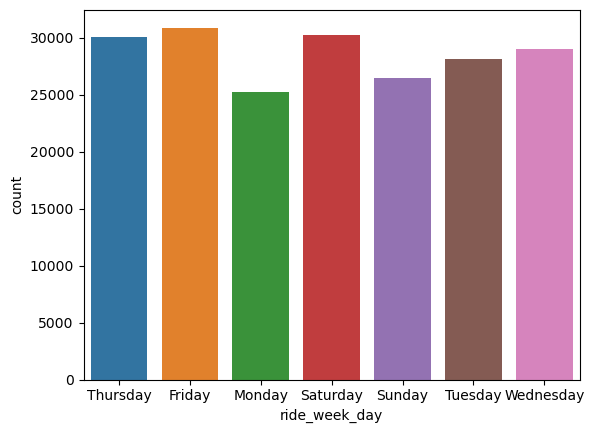

In [30]:
sns.countplot(x=data.ride_week_day);

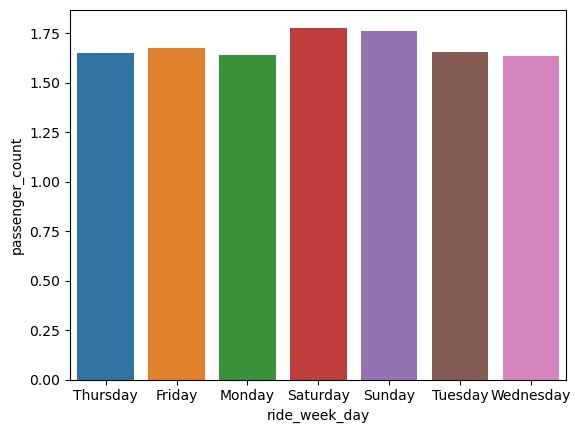

In [32]:
sns.barplot(x=data.ride_week_day, y=data.passenger_count, ci=False);

    On Saturday and sunday means on weakends the passenger count is more compare to all other days

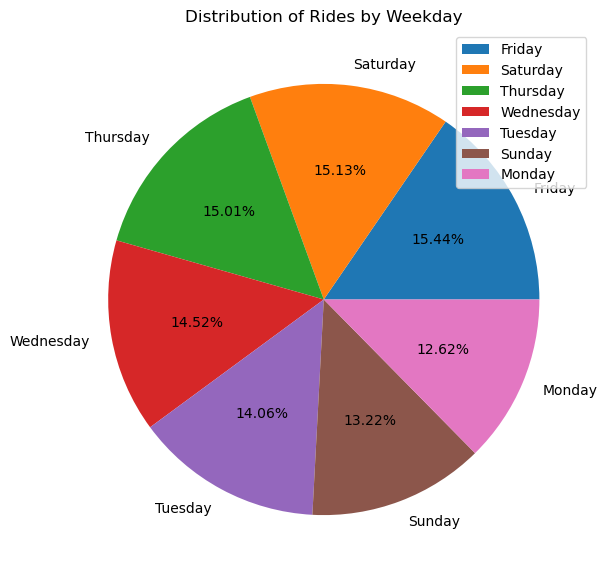

In [44]:
# This is pie plot shows share rides on weekdays.
plt.figure(figsize=(10,7))
plt.pie(x = data.ride_week_day.value_counts().values,
        labels = data.ride_week_day.value_counts().index,autopct = '%.2f%%')
plt.title('Distribution of Rides by Weekday')
plt.legend(loc = 'best')
plt.show();

    On Thursday, Friday and Saturday share of the rides is sightly more compare to other days

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

## Apply a Machine Learning Algorithm to predict the fare amount given following input features: passenger_count, distance and ride_week_day.

### Perform a 70-30 split of data.

In [51]:
# Taking the X (features) as input and y (target variable) as target.
X = data[['passenger_count', 'haversine_distance', 'ride_week_day']]
y = data['fare_amount']

### `Applying the traintestsplit for train and test data`

In [52]:
# Split the data into training and testing sets (70% train, 30% test)
# Applying the train test split to split the data into train and test means x_train, x_test, y_train and y_test data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [53]:
# Checking the shapes of x_train, x_test, y_train and y_test.
# Observing the how many datapoints are present in the train data and test data.
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(139999, 3) (139999,)
(60000, 3) (60000,)


### `Applying preprocessing on train data`

In [55]:
# Separating the numerical coulmns from the x_train data using select_dtypes.
X_train_num = X_train.select_dtypes(include=['int64','float64'])
X_train_num.head()

,passenger_count,haversine_distance
194320,1,1.270348
774,2,6.406598
75676,1,3.016657
37127,1,1.546083
96757,5,2.492464


### `Rescaling the Numerical Features`

In [56]:
from sklearn.preprocessing import StandardScaler # Importing the standardscaler from sklearn.preprocessing.
scalar = StandardScaler() # Creating the scaler object for the class.
# Taking the scalar object and using fit_transform we are rescaling the data.
X_train_num_transformed = pd.DataFrame(scalar.fit_transform(X_train_num),
                                      columns=X_train_num.columns,
                                      index= X_train_num.index)

In [57]:
X_train_num_transformed.head()

,passenger_count,haversine_distance
194320,-0.483094,-0.051319
774,0.221215,-0.037987
75676,-0.483094,-0.046786
37127,-0.483094,-0.050603
96757,2.334142,-0.048147


In [58]:
# Separating the categorical coulmns from the x_train data using select_dtypes.
X_train_cat = X_train.select_dtypes(include=['object'])
X_train_cat.head()

,ride_week_day
194320,Thursday
774,Saturday
75676,Wednesday
37127,Friday
96757,Sunday


### `Rescaling the Categorical Features`

In [60]:
# OneHotEncoding the categorical features
# Importing the OneHotEncoder from sklearn.preprocessing.
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse=False) # Creating the encoder object for the class.
# Taking the encoder object and using fit_transform we are rescaling the data.
X_train_cat_transformed = pd.DataFrame(encoder.fit_transform(X_train_cat),
                                      columns=encoder.get_feature_names_out(X_train_cat.columns),
                                      index=X_train_cat.index)

In [61]:
X_train_cat_transformed.head()

,ride_week_day_Monday,ride_week_day_Saturday,ride_week_day_Sunday,ride_week_day_Thursday,ride_week_day_Tuesday,ride_week_day_Wednesday
194320,0.0,0.0,0.0,1.0,0.0,0.0
774,0.0,1.0,0.0,0.0,0.0,0.0
75676,0.0,0.0,0.0,0.0,0.0,1.0
37127,0.0,0.0,0.0,0.0,0.0,0.0
96757,0.0,0.0,1.0,0.0,0.0,0.0


In [62]:
X_train_transformed = pd.concat([X_train_num_transformed, X_train_cat_transformed], axis=1)

X_train_transformed.head()

,passenger_count,haversine_distance,ride_week_day_Monday,ride_week_day_Saturday,ride_week_day_Sunday,ride_week_day_Thursday,ride_week_day_Tuesday,ride_week_day_Wednesday
194320,-0.483094,-0.051319,0.0,0.0,0.0,1.0,0.0,0.0
774,0.221215,-0.037987,0.0,1.0,0.0,0.0,0.0,0.0
75676,-0.483094,-0.046786,0.0,0.0,0.0,0.0,0.0,1.0
37127,-0.483094,-0.050603,0.0,0.0,0.0,0.0,0.0,0.0
96757,2.334142,-0.048147,0.0,0.0,1.0,0.0,0.0,0.0


### `Applying preprocessing on test data`

In [63]:
# Separating the numerical coulmns from the x_train data using select_dtypes.
X_test_num = X_test.select_dtypes(include=['int64','float64'])
X_test_num.head()

,passenger_count,haversine_distance
134253,1,2.098542
124141,1,0.960293
62810,5,3.377763
65425,1,2.716637
30074,1,0.784348


### `Rescaling the Numerical Features`

In [64]:
from sklearn.preprocessing import StandardScaler # Importing the standardscaler from sklearn.preprocessing.
scaler = StandardScaler() # Creating the scaler object for the class.
# Taking the scalar object and using fit_transform we are rescaling the data.
X_test_num_transformed = pd.DataFrame(scaler.fit_transform(X_test_num),
                                      columns=X_test_num.columns,
                                      index= X_test_num.index)

In [65]:
X_test_num_transformed.head()

,passenger_count,haversine_distance
134253,-0.522662,-0.048530
124141,-0.522662,-0.051545
62810,2.545729,-0.045142
65425,-0.522662,-0.046893
30074,-0.522662,-0.052011


In [66]:
# Separating the categorical coulmns from the x_train data using select_dtypes.
X_test_cat = X_test.select_dtypes(include=['object'])
X_test_cat.head()

,ride_week_day
134253,Wednesday
124141,Sunday
62810,Saturday
65425,Sunday
30074,Monday


### `Rescaling the Categorical Features`

In [67]:
# OneHotEncoding the categorical features
# Importing the OneHotEncoder from sklearn.preprocessing.
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse=False) # Creating the encoder object for the class.
# Taking the encoder object and using fit_transform we are rescaling the data.
X_test_cat_transformed = pd.DataFrame(encoder.fit_transform(X_test_cat),
                                      columns=encoder.get_feature_names_out(X_test_cat.columns),
                                      index=X_test_cat.index)

In [68]:
X_test_cat_transformed.head()

,ride_week_day_Monday,ride_week_day_Saturday,ride_week_day_Sunday,ride_week_day_Thursday,ride_week_day_Tuesday,ride_week_day_Wednesday
134253,0.0,0.0,0.0,0.0,0.0,1.0
124141,0.0,0.0,1.0,0.0,0.0,0.0
62810,0.0,1.0,0.0,0.0,0.0,0.0
65425,0.0,0.0,1.0,0.0,0.0,0.0
30074,1.0,0.0,0.0,0.0,0.0,0.0


In [69]:
X_test_transformed = pd.concat([X_test_num_transformed, X_test_cat_transformed], axis=1)

X_test_transformed.head()

,passenger_count,haversine_distance,ride_week_day_Monday,ride_week_day_Saturday,ride_week_day_Sunday,ride_week_day_Thursday,ride_week_day_Tuesday,ride_week_day_Wednesday
134253,-0.522662,-0.048530,0.0,0.0,0.0,0.0,0.0,1.0
124141,-0.522662,-0.051545,0.0,0.0,1.0,0.0,0.0,0.0
62810,2.545729,-0.045142,0.0,1.0,0.0,0.0,0.0,0.0
65425,-0.522662,-0.046893,0.0,0.0,1.0,0.0,0.0,0.0
30074,-0.522662,-0.052011,1.0,0.0,0.0,0.0,0.0,0.0


## *`Model Buliding and Training the model`*

In [70]:
# Initialize and train the models
linear_regression = LinearRegression()
decision_tree = DecisionTreeRegressor()
random_forest = RandomForestRegressor()
knn = KNeighborsRegressor()

In [71]:
linear_regression.fit(X_train_transformed, y_train)
decision_tree.fit(X_train_transformed, y_train)
random_forest.fit(X_train_transformed, y_train)
knn.fit(X_train_transformed, y_train)

LinearRegression()

DecisionTreeRegressor()

RandomForestRegressor()

KNeighborsRegressor()

In [72]:
# Make predictions on the test set
linear_regression_preds = linear_regression.predict(X_test_transformed)
decision_tree_preds = decision_tree.predict(X_test_transformed)
random_forest_preds = random_forest.predict(X_test_transformed)
knn_preds = knn.predict(X_test_transformed)

In [73]:
# Calculate the R-squared values
linear_regression_r2 = r2_score(y_test, linear_regression_preds)
decision_tree_r2 = r2_score(y_test, decision_tree_preds)
random_forest_r2 = r2_score(y_test, random_forest_preds)
knn_r2 = r2_score(y_test, knn_preds)

In [74]:
# Calculate the adjusted R-squared values
n = len(y_test)
p = X_test.shape[1]

adjusted_r2_linear = 1 - (1 - linear_regression_r2) * (n - 1) / (n - p - 1)
adjusted_r2_tree = 1 - (1 - decision_tree_r2) * (n - 1) / (n - p - 1)
adjusted_r2_forest = 1 - (1 - random_forest_r2) * (n - 1) / (n - p - 1)
adjusted_r2_knn = 1 - (1 - knn_r2) * (n - 1) / (n - p - 1)

In [75]:
# Print the adjusted R-squared values
print("Adjusted R-squared values:")
print("Linear Regression:", adjusted_r2_linear)
print("Decision Tree:", adjusted_r2_tree)
print("Random Forest:", adjusted_r2_forest)
print("KNN:", adjusted_r2_knn)

Adjusted R-squared values:
Linear Regression: 0.0006844815139146476
Decision Tree: 0.45988882217453975
Random Forest: 0.5996811425409279
KNN: 0.6081222383282444


_____